<a href="https://colab.research.google.com/github/sharad28/Tensile_-_compressive_strength/blob/main/Predictive_analysis_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 3.6 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=74423918f9ceae250df77748ae2415e5722a1084ff5ff032ac9b6b2b23ff29aa
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [3]:
import os 
import numpy as np
import pandas as pd
from docx import Document
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline

In [4]:
ROOT = "/content/drive/MyDrive/FSDS_Sunny/Classical_ML_concrete"

In [5]:
%cd /content/drive/MyDrive/FSDS_Sunny/Classical_ML_concrete

/content/drive/MyDrive/FSDS_Sunny/Classical_ML_concrete


In [6]:
class Config:
  raw_data_file_path = "./data/raw/1-s2.0-S2352340917300628-mmc2.docx"
  process_data_path = "./data/process"
  process_data_file = "strength.csv" 
   

In [7]:
document = Document(Config.raw_data_file_path)
table = document.tables[0]
data = [[cell.text for cell in row.cells] for row in table.rows]
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Source,Compressive \nstrength of \ncement\nfce(MPa),Tensile strength of cement\nfct(MPa),Curing \nage\n (day),Dmax of \nCrushed\n stone\n(mm),Stone powder content in \nSand (%),Fineness \nmodulus \nof sand,W/B,Water to cement ratio\n mw/mc,Water\n(kg/m3),Sand ratio\n(%),Slump\n(mm),"Compressive strength\nfcu,t\n(MPa)","Splitting tensile \nstrength\nfst,t(MPa)"
1,Zhao et al [1],46.8,8.0,3,31.5,5,3.34,0.56,0.56,180,44,50,32.5,1.18
2,Zhao et al [1],46.8,8.0,3,31.5,9,3.27,0.56,0.56,180,44,70,28.7,1.13
3,Zhao et al [1],46.8,8.0,3,31.5,13,2.77,0.56,0.56,180,44,50,28.5,1.56
4,Zhao et al [1],46.8,8.0,7,31.5,5,3.34,0.56,0.56,180,44,50,33.5,1.39


In [8]:
df1 = df.rename(columns=pd.Series([i.replace('\n',"") for i in df.iloc[0]]))
df1=df1.drop(index=0)

In [9]:
df1.head()


,Source,Compressive strength of cementfce(MPa),Tensile strength of cementfct(MPa),Curing age (day),Dmax of Crushed stone(mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water(kg/m3),Sand ratio(%),Slump(mm),"Compressive strengthfcu,t(MPa)","Splitting tensile strengthfst,t(MPa)"
1,Zhao et al [1],46.8,8.0,3,31.5,5,3.34,0.56,0.56,180,44,50,32.5,1.18
2,Zhao et al [1],46.8,8.0,3,31.5,9,3.27,0.56,0.56,180,44,70,28.7,1.13
3,Zhao et al [1],46.8,8.0,3,31.5,13,2.77,0.56,0.56,180,44,50,28.5,1.56
4,Zhao et al [1],46.8,8.0,7,31.5,5,3.34,0.56,0.56,180,44,50,33.5,1.39
5,Zhao et al [1],46.8,8.0,7,31.5,9,3.27,0.56,0.56,180,44,70,34.9,1.38


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 714
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Source                                  714 non-null    object
 1   Compressive strength of cementfce(MPa)  714 non-null    object
 2   Tensile strength of cementfct(MPa)      714 non-null    object
 3   Curing age (day)                        714 non-null    object
 4   Dmax of Crushed stone(mm)               714 non-null    object
 5   Stone powder content in Sand (%)        714 non-null    object
 6   Fineness modulus of sand                714 non-null    object
 7   W/B                                     714 non-null    object
 8   Water to cement ratio mw/mc             714 non-null    object
 9   Water(kg/m3)                            714 non-null    object
 10  Sand ratio(%)                           714 non-null    object
 11  Slump(

In [11]:
# Calculating percentage of missing values in data set
## replacing "-" with np.nan i.e., null for all columns
print("--"*40)
for i in df1.columns:
    df1[i]=df1[i].replace('-',np.nan)
    percent = (df1[i]).isnull().sum()/len(df1[i])*100    
    print(f"Number of Null value in {i} are {percent.round(1)} % ")
    if percent.round(1)>30:
      print("Have to consider to DROP as NAN > 30%")
      print()
    print("--"*40)


--------------------------------------------------------------------------------
Number of Null value in Source are 0.0 % 
--------------------------------------------------------------------------------
Number of Null value in Compressive strength of cementfce(MPa) are 34.6 % 
Have to consider to DROP as NAN > 30%

--------------------------------------------------------------------------------
Number of Null value in Tensile strength of cementfct(MPa) are 38.0 % 
Have to consider to DROP as NAN > 30%

--------------------------------------------------------------------------------
Number of Null value in Curing age (day) are 0.0 % 
--------------------------------------------------------------------------------
Number of Null value in Dmax of Crushed stone(mm) are 8.7 % 
--------------------------------------------------------------------------------
Number of Null value in Stone powder content in Sand (%) are 5.6 % 
-------------------------------------------------------------------

### Issue with data
* As null values are more than 30% have to drop following 
1.   'Tensile strength of cementfct(MPa)'
2.   'Compressive strength of cementfce(MPa)',

*Drop source as its not relevat to strenth parameter


1. 'Source'







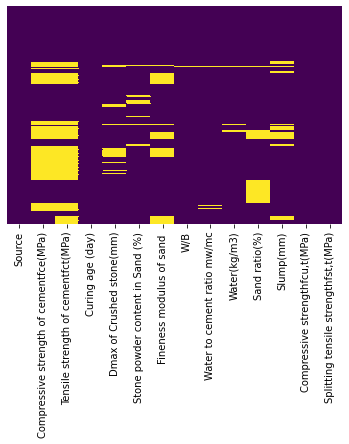

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# df2=df1.drop(columns=['Compressive strength of cementfce(MPa)', 'Tensile strength of cementfct(MPa)' ,'Source'])
df2=df1.drop(columns=['Source'])

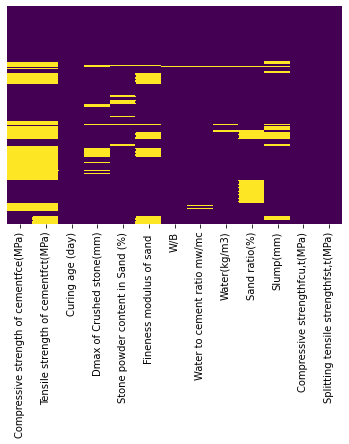

In [14]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df2['Curing age (day)'].unique()

array(['3', '7', '14', '28', '42', '56', '84', '118', '178', '238', '298',
       '358', '35', '70', '98', '148', '208', '268', '328', '388', '60',
       '90', '120', '1', '180', '365'], dtype=object)

In [16]:
try:
    df2['Curing age (day)'] = df2['Curing age (day)'].astype(int)
except ValueError as ve:
    print(ve)
# df2['Curing age (day)'].unique()

In [17]:
df2['Dmax of Crushed stone(mm)'].unique()


array(['31.5', '25', '26.5', '30', nan, '20', '16', '40', '80', '120',
       '60', '12'], dtype=object)

###Assumption 1
all "-" values will be considered as NULL. 

In [18]:
# df2['Dmax of Crushed stone(mm)']=df2['Dmax of Crushed stone(mm)'].replace('-',np.nan)

## already applied initailly

In [19]:
try:
    df2['Dmax of Crushed stone(mm)'] = df2['Dmax of Crushed stone(mm)'].astype(float)
except ValueError as ve:
    print(ve)


In [20]:
df2['Stone powder content in Sand (%)'].unique()

array(['5', '9', '13', '3', '7', '10', '16', '6.75', '7.5', '4.3', '5.8',
       nan, '10.8', '19.2', '14.2', '7.8', '16.3', '11.3', '19.4', '7.1*',
       '9.1*', '11.2*', '13.3*', '15.5*', '17.8*', '20.0*', '22.1*', '6*',
       '9*', '12*', '15*', '18*', '5.4', '6.6', '0.4', '2.3', '6.3',
       '4.2', '9.69', '0.8', '0', '15', '20', '18', '16.8', '21.7',
       '21.8', '16.7', '18.0', '18.2', '17.4', '17.5', '20.0', '12.1*',
       '15.0*', '18.0*', '21.0*', '13.8*', '20.8*', '25.9*', '5*', '10*',
       '20*', '25*', '6', '12', '16*', '21*', '0*', '30*', '40*', '24*',
       '11.2~13.0*', '13.0*', '12.4', '11.9*', '6.1*'], dtype=object)

###Assumption 2
* \* values are assumed to be representative of final values
* we have taken average wherever we see somevalues like this 11.2~13.0
* replacing - with 0

In [21]:
df2['Stone powder content in Sand (%)'] = df2['Stone powder content in Sand (%)'].replace('*',"")

In [22]:
df2['Stone powder content in Sand (%)'].replace('11.2~13.0*',12.1,inplace=True)

In [23]:
df2['Stone powder content in Sand (%)'] = (df2['Stone powder content in Sand (%)'].replace(regex='\*',value='').replace('-',np.nan)).astype(float)

In [24]:
df2['Stone powder content in Sand (%)'].unique()

array([ 5.  ,  9.  , 13.  ,  3.  ,  7.  , 10.  , 16.  ,  6.75,  7.5 ,
        4.3 ,  5.8 ,   nan, 10.8 , 19.2 , 14.2 ,  7.8 , 16.3 , 11.3 ,
       19.4 ,  7.1 ,  9.1 , 11.2 , 13.3 , 15.5 , 17.8 , 20.  , 22.1 ,
        6.  , 12.  , 15.  , 18.  ,  5.4 ,  6.6 ,  0.4 ,  2.3 ,  6.3 ,
        4.2 ,  9.69,  0.8 ,  0.  , 16.8 , 21.7 , 21.8 , 16.7 , 18.2 ,
       17.4 , 17.5 , 12.1 , 21.  , 13.8 , 20.8 , 25.9 , 25.  , 30.  ,
       40.  , 24.  , 12.4 , 11.9 ,  6.1 ])

In [25]:
df2['Fineness modulus of sand '].unique()

array(['3.34', '3.27', '2.77', '3.19', '3.23', '2.9', '3.0', '3.1', nan,
       '2.86', '3.04', '2.76', '2.35', '2.2', '3.55', '3.5', '2.80',
       '3.11', '2.94', '2.3', '2.8', '2.74', '2.85', '3.3', '2.6', '3.2',
       '2.67', '2.88', '2.73', '2.54', '2.7', '2.44~2.68', '2.44', '2.68',
       '2.42', '2.57', '2.92'], dtype=object)

In [26]:
df2['Fineness modulus of sand '] = df2['Fineness modulus of sand '].replace('-',np.nan).replace('2.44~2.68',2.56).astype(float)
df2['Fineness modulus of sand '].unique()

array([3.34, 3.27, 2.77, 3.19, 3.23, 2.9 , 3.  , 3.1 ,  nan, 2.86, 3.04,
       2.76, 2.35, 2.2 , 3.55, 3.5 , 2.8 , 3.11, 2.94, 2.3 , 2.74, 2.85,
       3.3 , 2.6 , 3.2 , 2.67, 2.88, 2.73, 2.54, 2.7 , 2.56, 2.44, 2.68,
       2.42, 2.57, 2.92])

In [27]:
df2['W/B'].unique()

array(['0.56', '0.45', '0.40', '0.47', '0.32', '0.44', '0.4', '0.55',
       '0.36', '0.31', '0.51', '0.25', '0.42', '0.46', '0.5', nan, '0.57',
       '0.64', '0.69', '0.59', '0.63', '0.28', '0.37', '0.34', '0.3',
       '0.24', '0.33', '0.35', '0.30', '0.39', '0.26', '0.54', '0.48',
       '0.53', '0.58', '0.6', '0.7', '0.38', '0.62', '0.50', '0.60',
       '1.0', '0.43'], dtype=object)

In [28]:
# df2['W/B'] = df2['W/B'].replace('-',np.nan).astype(float)

### already applied initial

In [29]:
# df2[df2['Water to cement ratio mw/mc']=='-']

### Assumption 3
* convert "-" to null values

In [30]:
# d = df2[df2['Water to cement ratio mw/mc']=='-']
# to_drop_index = list(d.index)
# to_drop_index

In [31]:
# df2.drop(index=to_drop_index,inplace=True)

In [32]:
df2['Water to cement ratio mw/mc'] = df2['Water to cement ratio mw/mc'].astype(float)

In [33]:
df2['Water to cement ratio mw/mc'].unique()

array([0.56 , 0.45 , 0.4  , 0.47 , 0.32 , 0.44 , 0.55 , 0.36 , 0.31 ,
       1.01 , 0.33 , 0.42 , 0.46 , 0.5  ,   nan, 0.57 , 0.64 , 0.69 ,
       0.59 , 0.63 , 0.48 , 0.34 , 0.425, 0.428, 0.3  , 0.457, 0.43 ,
       0.51 , 0.41 , 0.38 , 0.54 , 0.53 , 0.58 , 0.6  , 0.7  , 0.77 ,
       0.625, 0.75 , 1.   , 0.66 , 0.92 , 0.83 , 1.11 , 1.25 , 1.43 ,
       0.67 , 0.65 ])

In [34]:
df2.describe()

,Curing age (day),Dmax of Crushed stone(mm),Stone powder content in Sand (%),Fineness modulus of sand,Water to cement ratio mw/mc
count,714.000000,652.000000,674.000000,599.000000,704.000000
mean,56.729692,43.870399,10.831617,2.938247,0.593051
std,76.281596,26.238019,6.339589,0.274516,0.241827
min,1.000000,12.000000,0.000000,2.200000,0.300000
25%,28.000000,25.000000,6.100000,2.770000,0.440000
50%,28.000000,31.500000,11.200000,2.860000,0.500000
75%,80.500000,60.000000,13.000000,3.190000,0.670000
max,388.000000,120.000000,40.000000,3.550000,1.430000


In [35]:
df2['Water(kg/m3)'].unique()

array(['180', '185', '190', '170', '175', '160', '222', '150', nan, '178',
       '203', '241', '196', '109', '111', '113', '116', '119', '122',
       '124', '126', '129', '131', '133', '136', '139', '142', '144',
       '146', '128', '130', '135', '166', '158', '153', '152', '176',
       '168', '155', '149', '147', '145', '173', '164', '154', '120',
       '163', '184', '206', '248', '291', '205', '134', '138', '187',
       '188', '189', '191', '183', '186', '151', '179', '114', '110',
       '104', '108', '115', '192', '193', '83.5', '98', '87', '89', '88',
       '103', '102', '95', '85', '87~89', '101~103', '74~76', '70~72',
       '81~83', '112', '117', '178.75'], dtype=object)

### Assumption 4
* all values with  " - " are converted to null

In [36]:
# df2[df2['Water(kg/m3)']=='-']

In [37]:
# w=df2[df2['Water(kg/m3)']=='-']
# to_drop_indexw = list(w.index)
# print(to_drop_index)
# df2.drop(index=to_drop_indexw,inplace=True)

In [38]:

df2['Water(kg/m3)']=df2['Water(kg/m3)'].replace('87~89',88).replace('101~103',102).replace('74~76',75).replace('70~72',71).replace('81~83',82)
df2['Water(kg/m3)'] = df2['Water(kg/m3)'].astype(float)
df2['Water(kg/m3)'].unique()

array([180.  , 185.  , 190.  , 170.  , 175.  , 160.  , 222.  , 150.  ,
          nan, 178.  , 203.  , 241.  , 196.  , 109.  , 111.  , 113.  ,
       116.  , 119.  , 122.  , 124.  , 126.  , 129.  , 131.  , 133.  ,
       136.  , 139.  , 142.  , 144.  , 146.  , 128.  , 130.  , 135.  ,
       166.  , 158.  , 153.  , 152.  , 176.  , 168.  , 155.  , 149.  ,
       147.  , 145.  , 173.  , 164.  , 154.  , 120.  , 163.  , 184.  ,
       206.  , 248.  , 291.  , 205.  , 134.  , 138.  , 187.  , 188.  ,
       189.  , 191.  , 183.  , 186.  , 151.  , 179.  , 114.  , 110.  ,
       104.  , 108.  , 115.  , 192.  , 193.  ,  83.5 ,  98.  ,  87.  ,
        89.  ,  88.  , 103.  , 102.  ,  95.  ,  85.  ,  75.  ,  71.  ,
        82.  , 112.  , 117.  , 178.75])

In [39]:
df2['Sand ratio(%)'].unique()

array(['44', '36', '34', '30', '32', '42', '28', '38', '45', '41', '40',
       '39', nan, '35', '43', '37', '33', '41.7', '38.8', '36.1', '33.5',
       '34.5', '35.5', '48', '27', '29', '31', '26', '24', '26.5', '27.0',
       '29.5', '30.0', '53', '54'], dtype=object)

In [40]:
# df2['Sand ratio(%)'] = (df2['Sand ratio(%)'].replace('-',np.nan)) # already applied
df2['Sand ratio(%)'] = df2['Sand ratio(%)'].astype(float)

In [41]:
df2['Sand ratio(%)'].unique()

array([44. , 36. , 34. , 30. , 32. , 42. , 28. , 38. , 45. , 41. , 40. ,
       39. ,  nan, 35. , 43. , 37. , 33. , 41.7, 38.8, 36.1, 33.5, 34.5,
       35.5, 48. , 27. , 29. , 31. , 26. , 24. , 26.5, 29.5, 53. , 54. ])

In [42]:
df2['Slump(mm)'].unique()


array(['50', '70', '110', '160', '45', '30', '60', '22', '16', '28', '11',
       '17', '12', '20', '13', '35', '18', '85', '108', '75', '80', '135',
       '100', '150', '170', '175', '19', '15', '83', '115', '125', '90',
       '95', '25', nan, '36', '40', '43', '205', '200', '140', '240',
       '225', '220', '180', '86', '88', '87', '171', '177', '182', '176',
       '179', '173', '55', '185', '105', '41', '42', '33', '210', '215',
       '202', '208', '190', '203', '130', '260', '195', '230', '120',
       '72', '57', '58', '155', '61', '51', '52', '56', '53', '<10', '44',
       '49', '46', '54', '47', '48', '145'], dtype=object)

In [43]:
df2['Slump(mm)'] = (df2['Slump(mm)'].replace('<10',5).replace('-',np.nan)).astype(float)
df2['Slump(mm)'].unique()

array([ 50.,  70., 110., 160.,  45.,  30.,  60.,  22.,  16.,  28.,  11.,
        17.,  12.,  20.,  13.,  35.,  18.,  85., 108.,  75.,  80., 135.,
       100., 150., 170., 175.,  19.,  15.,  83., 115., 125.,  90.,  95.,
        25.,  nan,  36.,  40.,  43., 205., 200., 140., 240., 225., 220.,
       180.,  86.,  88.,  87., 171., 177., 182., 176., 179., 173.,  55.,
       185., 105.,  41.,  42.,  33., 210., 215., 202., 208., 190., 203.,
       130., 260., 195., 230., 120.,  72.,  57.,  58., 155.,  61.,  51.,
        52.,  56.,  53.,   5.,  44.,  49.,  46.,  54.,  47.,  48., 145.])

In [44]:
df2['Compressive strength of cementfce(MPa)'].unique()

array(['46.8', '38.2', '47.7', '46.3', '48.2', '48.3', nan, '35.5',
       '63.4', '55.6', '52.5', '52.7', '43.7', '55.8', '55.2', '', '52.6',
       '44.5', '44.8', '47.6', '51.7', '60.8', '62.4', '52.9', '39.42',
       '48.07'], dtype=object)

### Assumption replacing empty space with Null values and coverting it

In [45]:
df2['Compressive strength of cementfce(MPa)'] = df2['Compressive strength of cementfce(MPa)'].replace('',np.nan).astype(float)

In [46]:
df2['Tensile strength of cementfct(MPa)'].unique()

array(['8.0', '6.9', '8.7', '8.4', '7.4', nan, '7.2', '10.2', '8.91',
       '8.8', '9.0', '7.5', '10.8', '8.9', '', '9.4', '7.8', '7.9', '8.5',
       '9.1'], dtype=object)

In [47]:
df2['Tensile strength of cementfct(MPa)'] = df2['Tensile strength of cementfct(MPa)'].replace('',np.nan).astype(float)

### Assumption 5
* considering * and # values as final values

In [48]:
df2['Compressive strengthfcu,t(MPa)']= (df2['Compressive strengthfcu,t(MPa)'].replace(regex='#',value='')).astype(float)
df2['Splitting tensile strengthfst,t(MPa)'] = (df2['Splitting tensile strengthfst,t(MPa)'].replace(regex='※',value='')).astype(float)
df2['Splitting tensile strengthfst,t(MPa)'].unique()

array([1.18, 1.13, 1.56, 1.39, 1.38, 1.42, 2.62, 3.05, 2.31, 3.02, 3.75,
       3.01, 3.31, 3.82, 3.43, 3.73, 3.99, 3.68, 4.42, 4.21, 4.48, 4.37,
       4.03, 4.41, 4.68, 4.22, 3.92, 4.12, 4.36, 4.05, 4.23, 4.32, 2.67,
       2.61, 2.71, 2.81, 2.95, 3.06, 3.46, 3.19, 3.37, 3.49, 3.34, 3.54,
       3.67, 3.56, 3.96, 3.81, 3.76, 3.86, 3.78, 4.27, 4.47, 4.31, 4.52,
       4.61, 4.38, 4.69, 4.45, 4.07, 4.29, 4.26, 4.09, 4.24, 4.19, 4.25,
       4.04, 4.35, 4.43, 4.11, 4.3 , 2.96, 2.64, 2.39, 3.08, 3.39, 3.11,
       3.41, 3.45, 3.52, 3.94, 3.79, 3.97, 4.02, 4.33, 4.55, 4.59, 4.18,
       4.51, 4.34, 3.16, 3.44, 3.57, 3.6 , 3.58, 4.  , 4.1 , 3.9 , 4.2 ,
       3.91, 3.42, 2.86, 2.76, 3.51, 2.45, 3.95, 5.45, 3.32, 3.14, 3.65,
       3.88, 4.08, 4.57, 5.16, 5.32, 3.2 , 3.3 , 3.47, 3.18, 5.24, 4.53,
       3.62, 3.77, 2.87, 5.41, 6.37, 6.5 , 6.65, 3.04, 2.75, 2.6 , 2.42,
       3.24, 4.98, 4.5 , 1.63, 1.77, 1.84, 1.72, 1.97, 2.05, 2.11, 2.65,
       2.18, 2.19, 6.2 , 6.4 , 5.4 , 5.6 , 0.6 , 1.

### Multivariant analysis by heatmap

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
correlation = df2.corr(method='pearson')
correlation.columns

Index(['Compressive strength of cementfce(MPa)',
       'Tensile strength of cementfct(MPa)', 'Curing age (day)',
       'Dmax of Crushed stone(mm)', 'Stone powder content in Sand (%)',
       'Fineness modulus of sand ', 'Water to cement ratio mw/mc',
       'Water(kg/m3)', 'Sand ratio(%)', 'Slump(mm)',
       'Compressive strengthfcu,t(MPa)',
       'Splitting tensile strengthfst,t(MPa)'],
      dtype='object')

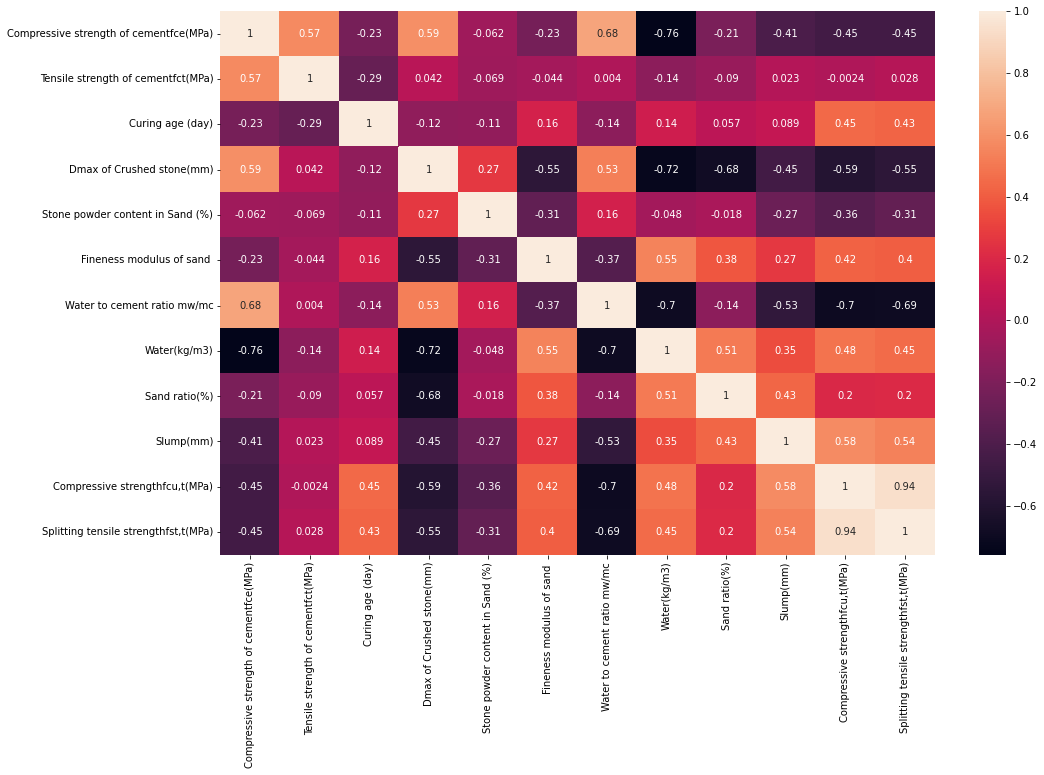

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


#Observation
* Compressive strength is highly related to tensile strength
* water to binder and water to cement ration have very high negative relation. i.e., increase in there two will decrease the strength parameters
* fineness modules of sand have very low influnce on strength

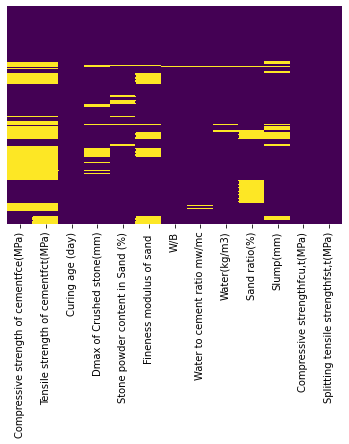

In [52]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Conversion of raw file to preprossed data


In [53]:
file_path = os.path.join(Config.process_data_path,Config.process_data_file)
os.makedirs(Config.process_data_path,exist_ok=True)
df2.to_csv(file_path,index=False) #saving file in file path

# Reading preprossed file from store

In [54]:
df2 = pd.read_csv(file_path,index_col=False)
try:
  df2 = df2.drop('Unnamed: 0',axis=1) # its a indexing column, and its not required
except Exception as e:
  print(e)
  pass
df2.head()

"['Unnamed: 0'] not found in axis"


,Compressive strength of cementfce(MPa),Tensile strength of cementfct(MPa),Curing age (day),Dmax of Crushed stone(mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water(kg/m3),Sand ratio(%),Slump(mm),"Compressive strengthfcu,t(MPa)","Splitting tensile strengthfst,t(MPa)"
0,46.8,8.0,3,31.5,5.0,3.34,0.56,0.56,180.0,44.0,50.0,32.5,1.18
1,46.8,8.0,3,31.5,9.0,3.27,0.56,0.56,180.0,44.0,70.0,28.7,1.13
2,46.8,8.0,3,31.5,13.0,2.77,0.56,0.56,180.0,44.0,50.0,28.5,1.56
3,46.8,8.0,7,31.5,5.0,3.34,0.56,0.56,180.0,44.0,50.0,33.5,1.39
4,46.8,8.0,7,31.5,9.0,3.27,0.56,0.56,180.0,44.0,70.0,34.9,1.38


# Using KNN for imputation of null value
Imputation using only feature data , we had drop the target data

In [55]:
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from numpy import mean
from numpy import std
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [56]:
df2.columns

Index(['Compressive strength of cementfce(MPa)',
       'Tensile strength of cementfct(MPa)', 'Curing age (day)',
       'Dmax of Crushed stone(mm)', 'Stone powder content in Sand (%)',
       'Fineness modulus of sand ', 'W/B', 'Water to cement ratio mw/mc',
       'Water(kg/m3)', 'Sand ratio(%)', 'Slump(mm)',
       'Compressive strengthfcu,t(MPa)',
       'Splitting tensile strengthfst,t(MPa)'],
      dtype='object')

In [57]:
X = df2.drop(['Compressive strengthfcu,t(MPa)',
       'Splitting tensile strengthfst,t(MPa)'],axis=1)
y = df2[['Compressive strengthfcu,t(MPa)',
       'Splitting tensile strengthfst,t(MPa)']]
y1 = df2['Compressive strengthfcu,t(MPa)']
y2 = df2['Splitting tensile strengthfst,t(MPa)']

#Testing for Compressive strength prediction

>1 0.452 (0.396)
>3 0.563 (0.237)
>5 0.559 (0.240)
>10 0.484 (0.375)
>15 0.462 (0.465)
>18 0.480 (0.427)
>21 0.506 (0.405)


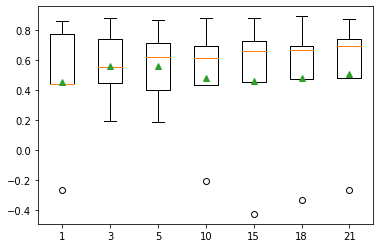

In [58]:
warnings.filterwarnings('ignore')
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,10,15,18,21]]
for s in strategies:
	# create the modeling pipeline
  imputer =  KNNImputer(n_neighbors=int(s))
  model = xg.XGBRegressor(max_depth=9,min_child_weight=5,learning_rate=0.09,reg = 'squarederror',verbosity = 0)
  # model = RandomForestRegressor()
  pipeline = Pipeline(steps=[('i',imputer), ('m', model)])
	# evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X.to_numpy(), y1,scoring='r2')
	# store results
  print
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


#Testing for tensile strength prediction

>1 0.403 (0.370)
>3 0.507 (0.232)
>5 0.448 (0.246)
>10 0.299 (0.586)
>15 0.416 (0.376)
>18 0.370 (0.459)
>21 0.348 (0.492)


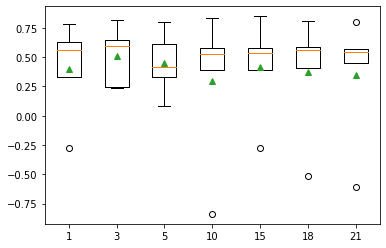

In [59]:
warnings.filterwarnings('ignore')
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,10,15,18,21]]
for s in strategies:
	# create the modeling pipeline
  imputer =  KNNImputer(n_neighbors=int(s))
  model = xg.XGBRegressor(max_depth=9,min_child_weight=5,learning_rate=0.09,reg = 'squarederror',verbosity = 0,)
  # model = RandomForestRegressor()
  pipeline = Pipeline(steps=[('i',imputer), ('m', model)])
	# evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X.to_numpy(), y2,scoring='r2') # y2 represent tensile strength
	# store results
  print
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


# following are the observation w.r.t KNN imputer
* In both cases score is low for K=10
* applying imputer KNN with k = 10

In [60]:
n_neighbors=10
print(X.shape)
print(X.isnull().sum())
columns = X.columns
imputer = KNNImputer(n_neighbors=n_neighbors)
X = imputer.fit_transform(X,y)
X = pd.DataFrame(X,columns=columns)
print(X.shape)
print(X.isnull().sum())

(714, 11)
Compressive strength of cementfce(MPa)    251
Tensile strength of cementfct(MPa)        275
Curing age (day)                            0
Dmax of Crushed stone(mm)                  62
Stone powder content in Sand (%)           40
Fineness modulus of sand                  115
W/B                                         4
Water to cement ratio mw/mc                10
Water(kg/m3)                               13
Sand ratio(%)                             106
Slump(mm)                                  75
dtype: int64
(714, 11)
Compressive strength of cementfce(MPa)    0
Tensile strength of cementfct(MPa)        0
Curing age (day)                          0
Dmax of Crushed stone(mm)                 0
Stone powder content in Sand (%)          0
Fineness modulus of sand                  0
W/B                                       0
Water to cement ratio mw/mc               0
Water(kg/m3)                              0
Sand ratio(%)                             0
Slump(mm)            

#Gread serach CV on xgboost

In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

## Gread Serach CV for compressive strength

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X,y1,test_size=0.2,random_state=28,shuffle=True)

In [89]:
params ={"learning_rate" : [ 0.5, 0.1, 0.01, 0.001 ],
  "max_depth": [ 3, 5, 10, 20 ],
  "n_estimators" : [ 10, 50, 100, 200 ]
}
xgr = XGBRegressor(objective='reg:squarederror')
grid = GridSearchCV(xgr,params,verbose=3,cv=5,scoring=["r2","neg_mean_squared_error"],refit="neg_mean_squared_error")
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-34.043) r2: (test=0.937) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-23.900) r2: (test=0.947) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-25.171) r2: (test=0.935) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-22.783) r2: (test=0.953) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-35.248) r2: (test=0.926) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-24.129) r2: (test=0.956) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-12.750) r2: (test=0.972

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error'], verbose=3)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred  = grid.predict(x_test)
rmse = round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2)
r2 = round(r2_score(y_test,y_test_pred),2)
print(f"RMSE : {rmse} & r2 :{r2}")

RMSE : 3.61 & r2 :0.97


In [91]:
grid.best_estimator_

XGBRegressor(max_depth=10, objective='reg:squarederror')

## Gread Serach CV for Tensile strength

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X,y2,test_size=0.2,random_state=28,shuffle=True)

In [93]:
params ={"learning_rate" : [ 0.5, 0.1, 0.01, 0.001 ],
  "max_depth": [ 3, 5, 10, 20 ],
  "n_estimators" : [ 10, 50, 100, 200 ]
}
xgr = XGBRegressor(objective='reg:squarederror')
grid = GridSearchCV(xgr,params,verbose=3,cv=5,scoring=["r2","neg_mean_squared_error"],refit="neg_mean_squared_error")
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-0.186) r2: (test=0.910) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-0.162) r2: (test=0.910) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-0.202) r2: (test=0.864) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-0.198) r2: (test=0.893) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10; neg_mean_squared_error: (test=-0.155) r2: (test=0.911) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-0.170) r2: (test=0.918) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-0.131) r2: (test=0.928) total

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error'], verbose=3)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred  = grid.predict(x_test)
rmse = round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2)
r2 = round(r2_score(y_test,y_test_pred),2)
print(f"RMSE : {rmse} & r2 :{r2}")

RMSE : 0.35 & r2 :0.93


In [95]:
grid.best_estimator_

XGBRegressor(max_depth=5, n_estimators=200, objective='reg:squarederror')